In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
!pip install catboost
!pip install lightgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import pandas as pd

In [320]:
df = pd.read_csv('/content/train_B.csv')

In [321]:
test = pd.read_csv('/content/test_B.csv')

In [322]:
df.head(10)

,id,user_age_group,gender,subscription_plan,monthly_price_inr,subscription_duration_days,payment_method,num_payment_failures_90d,days_since_last_login,avg_session_duration_min,...,price_increase_experienced,used_discount_code,device_type,os_version_age_months,internet_speed_category,onboarding_completed,content_category_preference,days_since_last_feature_use,notification_opt_in,churn_reason
0,1,middle_aged,male,student,75.0,1235,upi,6,27,20.2,...,False,False,mid_android,16.0,fast_4g,False,education,68.0,True,found_alternative
1,2,adult,male,basic,138.0,465,upi,3,124,3.6,...,True,True,budget_android,27.0,moderate_3g,False,entertainment,27.0,False,lost_interest
2,3,young_adult,male,student,140.0,1805,upi,8,29,68.0,...,False,False,flagship_android,4.0,moderate_3g,False,mixed,323.0,False,found_alternative
3,4,teen,male,basic,149.0,1049,debit_card,1,76,11.8,...,True,True,budget_android,11.0,slow_2g,True,productivity,360.0,False,price_sensitive
4,5,young_adult,female,standard,224.0,678,upi,1,356,49.8,...,False,False,multi_device,31.0,broadband,False,fitness,206.0,True,lost_interest
5,6,young_adult,female,basic,100.0,1018,upi,2,111,14.2,...,False,False,budget_android,49.0,broadband,True,news,365.0,False,found_alternative
6,7,adult,male,standard,253.0,1050,upi,2,265,70.6,...,False,True,ipad,17.0,broadband,False,social,175.0,True,lost_interest
7,8,adult,male,basic,139.0,616,upi,4,170,2.4,...,False,False,budget_android,NaN,fast_4g,True,entertainment,336.0,False,bad_experience
8,9,adult,male,student,147.0,1452,debit_card,3,109,32.7,...,False,False,budget_android,48.0,fast_4g,False,productivity,33.0,True,bad_experience
9,10,adult,female,student,69.0,158,debit_card,12,43,0.2,...,True,False,desktop,4.0,fast_4g,False,mixed,140.0,False,price_sensitive


In [323]:
df.shape

(3500, 30)

In [324]:
df.columns

Index(['id', 'user_age_group', 'gender', 'subscription_plan',
       'monthly_price_inr', 'subscription_duration_days', 'payment_method',
       'num_payment_failures_90d', 'days_since_last_login',
       'avg_session_duration_min', 'sessions_per_week', 'session_trend_30d',
       'features_used_pct', 'num_support_tickets_90d',
       'avg_ticket_resolution_hrs', 'unresolved_tickets',
       'app_crash_count_30d', 'rating_given', 'num_referrals_made',
       'competitor_app_installed', 'price_increase_experienced',
       'used_discount_code', 'device_type', 'os_version_age_months',
       'internet_speed_category', 'onboarding_completed',
       'content_category_preference', 'days_since_last_feature_use',
       'notification_opt_in', 'churn_reason'],
      dtype='object')

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3500 non-null   int64  
 1   user_age_group               3500 non-null   object 
 2   gender                       3500 non-null   object 
 3   subscription_plan            3500 non-null   object 
 4   monthly_price_inr            3500 non-null   float64
 5   subscription_duration_days   3500 non-null   int64  
 6   payment_method               3500 non-null   object 
 7   num_payment_failures_90d     3500 non-null   int64  
 8   days_since_last_login        3500 non-null   int64  
 9   avg_session_duration_min     3324 non-null   float64
 10  sessions_per_week            3349 non-null   float64
 11  session_trend_30d            3500 non-null   object 
 12  features_used_pct            3351 non-null   float64
 13  num_support_ticket

In [326]:
df.describe()

,id,monthly_price_inr,subscription_duration_days,num_payment_failures_90d,days_since_last_login,avg_session_duration_min,sessions_per_week,features_used_pct,num_support_tickets_90d,avg_ticket_resolution_hrs,unresolved_tickets,app_crash_count_30d,rating_given,num_referrals_made,os_version_age_months,days_since_last_feature_use
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3324.000000,3349.000000,3351.000000,3500.000000,3328.000000,3500.000000,3500.000000,3318.000000,3500.000000,3313.000000,3351.000000
mean,1750.500000,252.835714,910.969429,2.437714,185.244571,19.707732,4.938907,40.595912,3.573714,33.783594,1.354857,19.149429,2.116004,3.048857,29.987323,181.992241
std,1010.507298,248.067018,525.142841,3.252164,104.676101,19.933595,4.893779,19.646788,4.468875,45.904755,2.276868,16.797525,1.699314,4.237472,17.865485,105.075870
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,875.750000,97.000000,456.750000,0.000000,95.000000,5.800000,1.400000,26.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,91.000000
50%,1750.500000,157.000000,904.000000,1.000000,188.000000,13.500000,3.500000,40.300000,2.000000,16.400000,0.000000,17.000000,2.100000,1.000000,30.000000,181.000000
75%,2625.250000,370.000000,1361.000000,4.000000,274.000000,27.000000,7.000000,54.150000,5.000000,48.900000,2.000000,34.000000,3.700000,4.000000,46.000000,273.000000
max,3500.000000,997.000000,1825.000000,15.000000,365.000000,161.700000,38.100000,100.000000,20.000000,348.400000,10.000000,50.000000,5.000000,20.000000,60.000000,365.000000


In [327]:
df.duplicated().sum()

np.int64(0)

In [328]:
categorical_cols = ["user_age_group","churn_reason","gender","subscription_plan","payment_method","session_trend_30d","device_type","internet_speed_category","content_category_preference"]

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for user_age_group:
user_age_group
adult          1074
young_adult    1035
middle_aged     709
senior          343
teen            339
Name: count, dtype: int64

Value counts for churn_reason:
churn_reason
found_alternative    1062
price_sensitive      1001
lost_interest         776
bad_experience        661
Name: count, dtype: int64

Value counts for gender:
gender
male           1477
female         1435
non_binary      306
undisclosed     282
Name: count, dtype: int64

Value counts for subscription_plan:
subscription_plan
basic         902
standard      874
student       660
free_trial    562
premium       502
Name: count, dtype: int64

Value counts for payment_method:
payment_method
upi            1199
debit_card      753
wallet          675
credit_card     544
net_banking     329
Name: count, dtype: int64

Value counts for session_trend_30d:
session_trend_30d
declining     1393
inactive      1110
stable         650
increasing     347
Name: count, dtype: int64

Value c

In [329]:
df.isnull().sum()

,0
id,0
user_age_group,0
gender,0
subscription_plan,0
monthly_price_inr,0
subscription_duration_days,0
payment_method,0
num_payment_failures_90d,0
days_since_last_login,0
avg_session_duration_min,176


In [330]:
df["avg_session_duration_min"]= df["avg_session_duration_min"].fillna(df["avg_session_duration_min"].mean())
df["sessions_per_week"]= df["sessions_per_week"].fillna(df["sessions_per_week"].mean())
df["features_used_pct"]= df["features_used_pct"].fillna(df["features_used_pct"].mean())
df["avg_ticket_resolution_hrs"]= df["avg_ticket_resolution_hrs"].fillna(df["avg_ticket_resolution_hrs"].mean())
df["rating_given"]= df["rating_given"].fillna(df["rating_given"].mean())
df["os_version_age_months"]= df["os_version_age_months"].fillna(df["os_version_age_months"].mean())
df["days_since_last_feature_use"]= df["days_since_last_feature_use"].fillna(df["days_since_last_feature_use"].mean())


In [331]:
df.isnull().sum()

,0
id,0
user_age_group,0
gender,0
subscription_plan,0
monthly_price_inr,0
subscription_duration_days,0
payment_method,0
num_payment_failures_90d,0
days_since_last_login,0
avg_session_duration_min,0


In [332]:
le = LabelEncoder()

categorical_cols = ["user_age_group","gender","subscription_plan","payment_method","session_trend_30d","competitor_app_installed","price_increase_experienced","used_discount_code","device_type","device_type","internet_speed_category","onboarding_completed","content_category_preference","notification_opt_in","churn_reason"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [333]:
df.head(10)

,id,user_age_group,gender,subscription_plan,monthly_price_inr,subscription_duration_days,payment_method,num_payment_failures_90d,days_since_last_login,avg_session_duration_min,...,price_increase_experienced,used_discount_code,device_type,os_version_age_months,internet_speed_category,onboarding_completed,content_category_preference,days_since_last_feature_use,notification_opt_in,churn_reason
0,1,1,1,4,75.0,1235,3,6,27,20.2,...,0,0,5,16.000000,1,0,0,68.0,1,1
1,2,0,1,0,138.0,465,3,3,124,3.6,...,1,1,0,27.000000,2,0,1,27.0,0,2
2,3,4,1,4,140.0,1805,3,8,29,68.0,...,0,0,2,4.000000,2,0,3,323.0,0,1
3,4,3,1,0,149.0,1049,1,1,76,11.8,...,1,1,0,11.000000,3,1,5,360.0,0,3
4,5,4,0,3,224.0,678,3,1,356,49.8,...,0,0,6,31.000000,0,0,2,206.0,1,2
5,6,4,0,0,100.0,1018,3,2,111,14.2,...,0,0,0,49.000000,0,1,4,365.0,0,1
6,7,0,1,3,253.0,1050,3,2,265,70.6,...,0,1,3,17.000000,0,0,6,175.0,1,2
7,8,0,1,0,139.0,616,3,4,170,2.4,...,0,0,0,29.987323,1,1,1,336.0,0,0
8,9,0,1,4,147.0,1452,1,3,109,32.7,...,0,0,0,48.000000,1,0,5,33.0,1,0
9,10,0,0,4,69.0,158,1,12,43,0.2,...,1,0,1,4.000000,1,0,3,140.0,0,3


In [334]:
from sklearn.model_selection import train_test_split


In [335]:
X = df.drop('churn_reason', axis=1)
y = df['churn_reason']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [336]:
from sklearn.preprocessing import StandardScaler

In [337]:
numerical_cols = ["monthly_price_inr","subscription_duration_days","days_since_last_login","num_payment_failures_90d","avg_session_duration_min","sessions_per_week","features_used_pct","num_support_tickets_90d","avg_ticket_resolution_hrs","unresolved_tickets","app_crash_count_30d","rating_given","num_referrals_made","os_version_age_months","days_since_last_feature_use"]

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head(50)

,id,user_age_group,gender,subscription_plan,monthly_price_inr,subscription_duration_days,payment_method,num_payment_failures_90d,days_since_last_login,avg_session_duration_min,...,price_increase_experienced,used_discount_code,device_type,os_version_age_months,internet_speed_category,onboarding_completed,content_category_preference,days_since_last_feature_use,notification_opt_in,churn_reason
0,1,1,1,4,-0.716988,0.617121,3,1.095515,-1.511971,2.534458e-02,...,0,0,5,-0.804838,1,0,0,-1.108878e+00,1,1
1,2,0,1,0,-0.462988,-0.849356,3,0.172921,-0.585170,-8.293113e-01,...,1,1,0,-0.171892,2,0,1,-1.507713e+00,0,2
2,3,4,1,4,-0.454925,1.702695,3,1.710578,-1.492861,2.486342e+00,...,0,0,2,-1.495325,2,0,3,1.371676e+00,0,1
3,4,3,1,0,-0.418639,0.262881,1,-0.442142,-1.043793,-4.071319e-01,...,1,1,0,-1.092541,3,1,5,1.731600e+00,0,3
4,5,4,0,3,-0.116258,-0.443694,3,-0.442142,1.631507,1.549309e+00,...,0,0,6,0.058270,0,0,2,2.335394e-01,1,2
5,6,4,0,0,-0.616195,0.203841,3,-0.134611,-0.709380,-2.835672e-01,...,0,0,0,1.094000,0,1,4,1.780238e+00,0,1
6,7,0,1,3,0.000662,0.264786,3,-0.134611,0.762035,2.620203e+00,...,0,1,3,-0.747298,0,0,6,-6.801818e-02,1,2
7,8,0,1,0,-0.458957,-0.561774,3,0.480452,-0.145656,-8.910937e-01,...,0,0,0,0.000000,1,1,1,1.498136e+00,0,0
8,9,0,1,4,-0.426703,1.030401,1,0.172921,-0.728490,6.689108e-01,...,0,0,0,1.036459,1,0,5,-1.449347e+00,1,0
9,10,0,0,4,-0.741179,-1.434042,1,2.940704,-1.359096,-1.004361e+00,...,1,0,1,-1.495325,1,0,3,-4.084865e-01,0,3


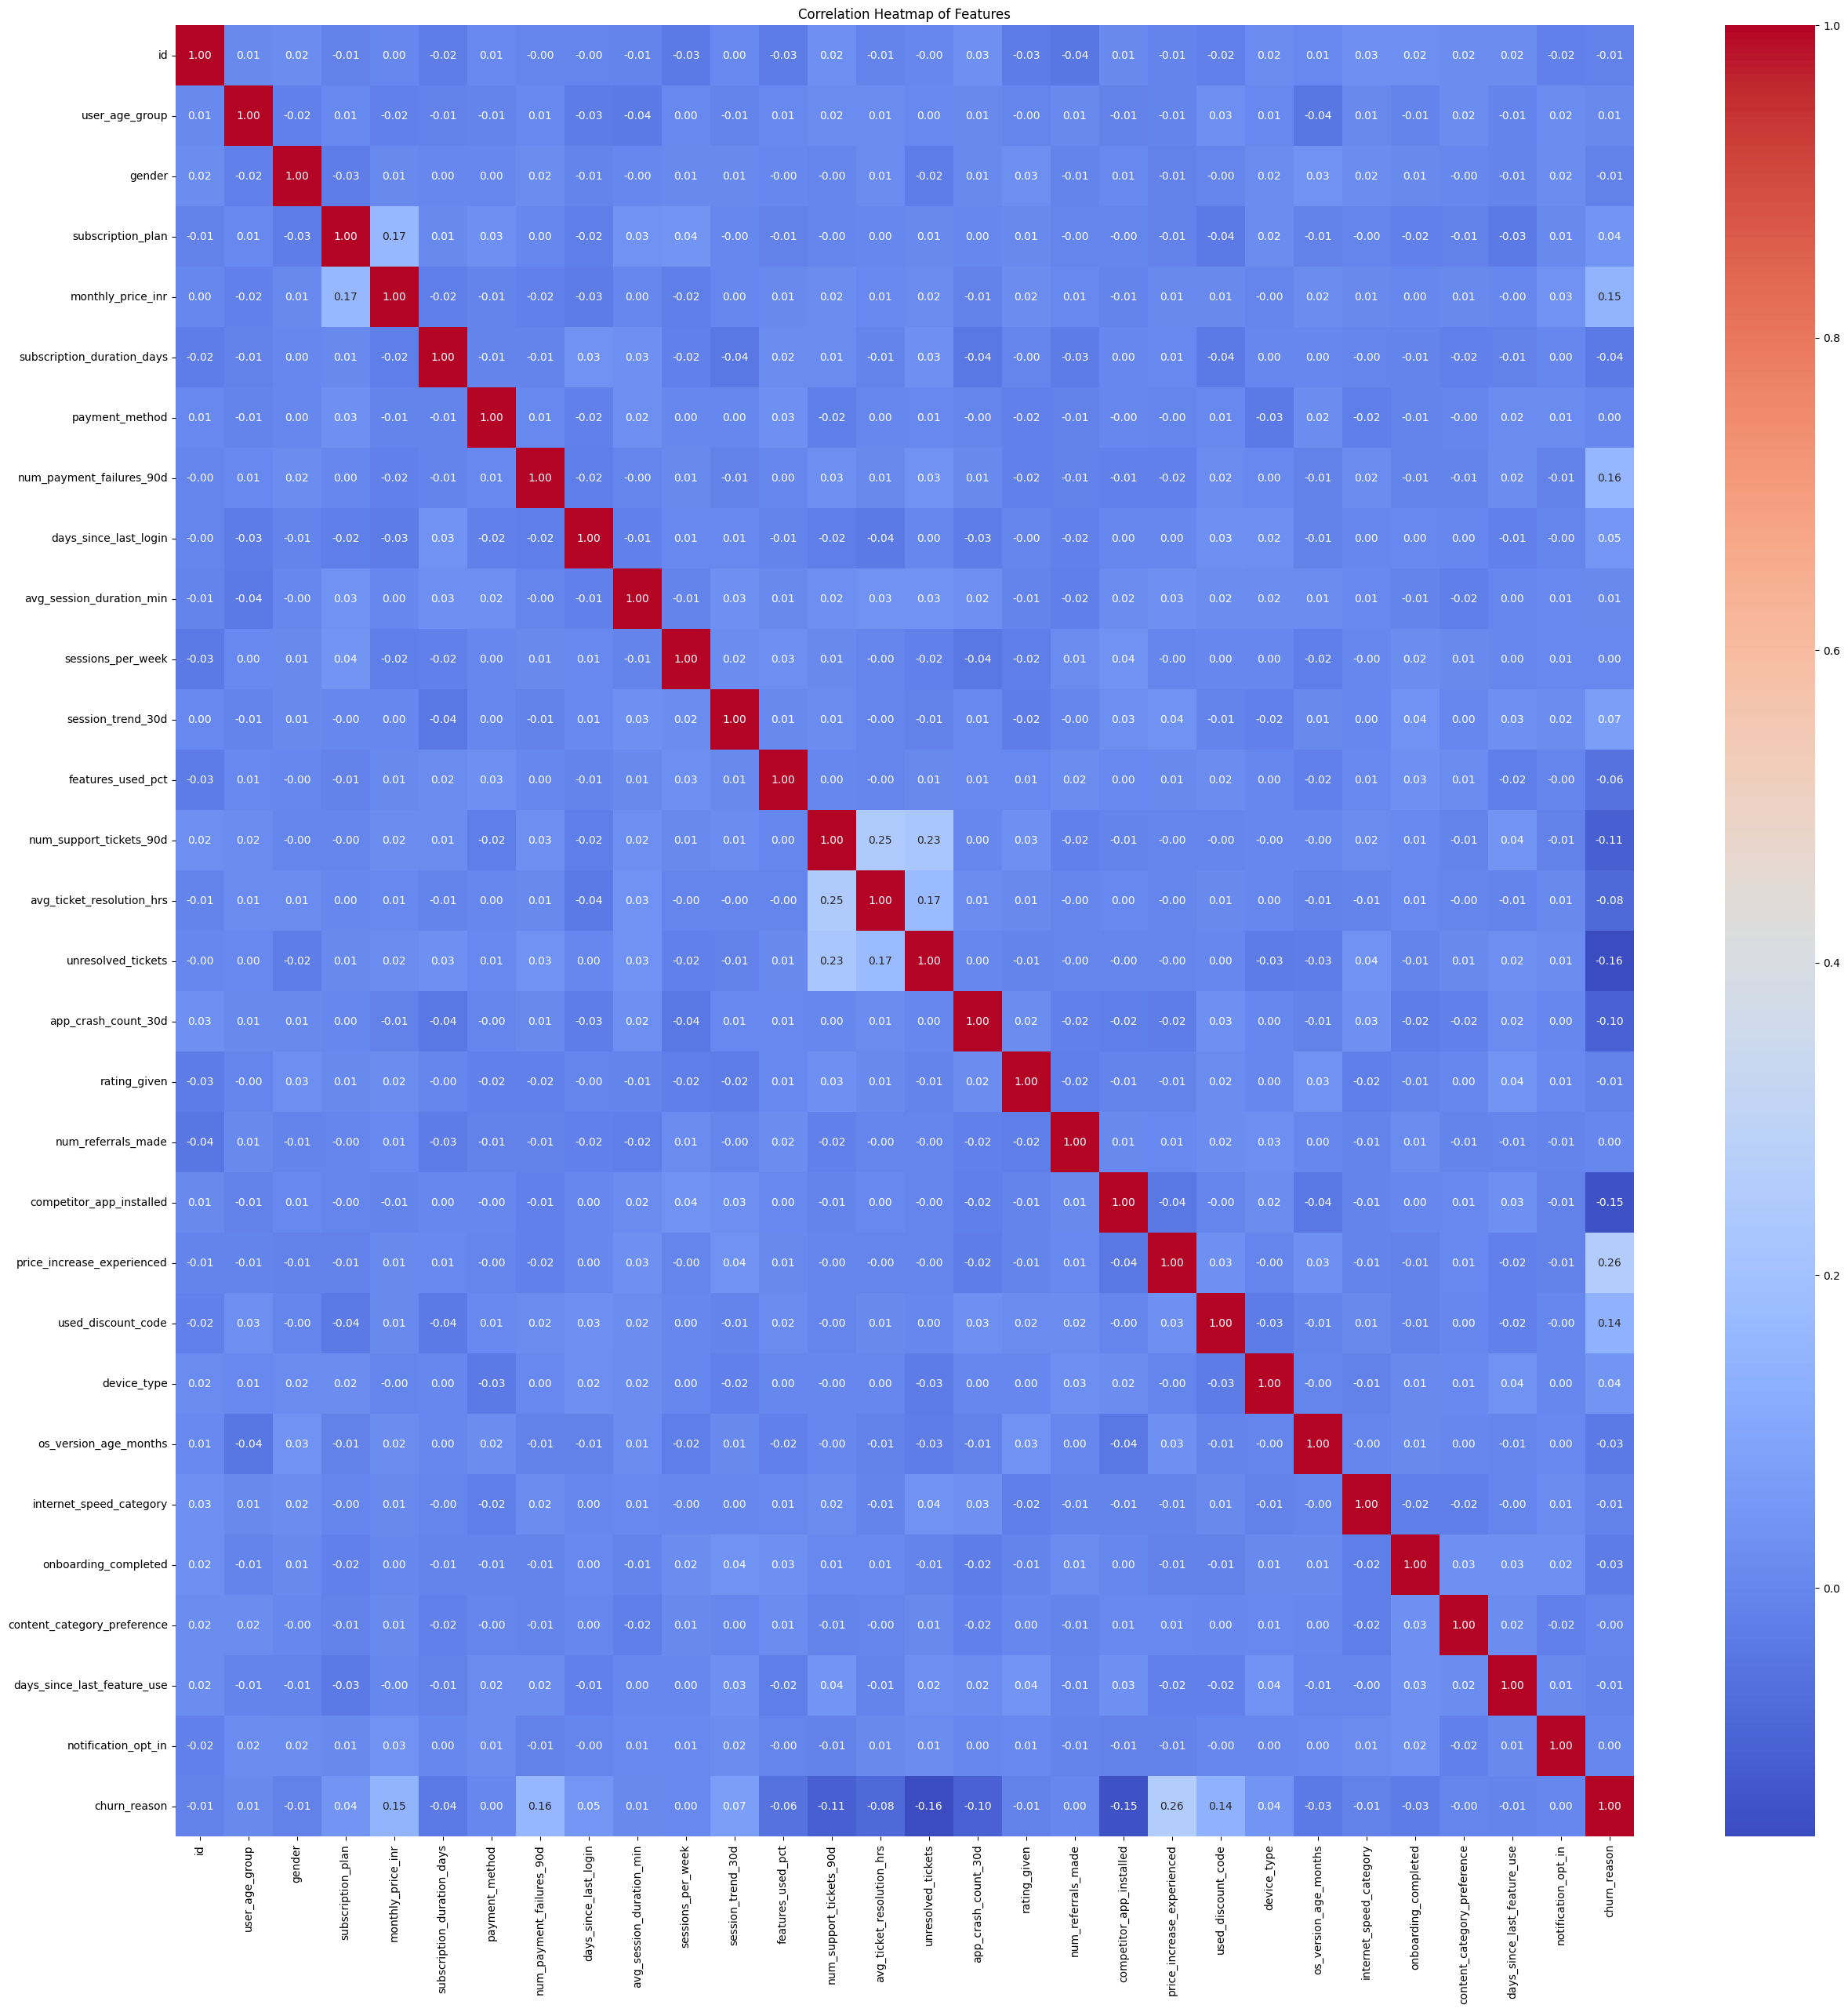

In [338]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [340]:
models =[
    ("XGBoost", xgb.XGBClassifier(
        objective="multi:softprob",
        num_class=4,
        n_estimators=400,
        learning_rate=0.03,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1.0,
        reg_lambda=5.0,
        random_state=42,
        n_jobs=-1
    )),

    ("CatBoost", CatBoostClassifier(
        iterations=400,
        learning_rate=0.03,
        depth=4,
        l2_leaf_reg=5,
        bagging_temperature=1,
        loss_function='MultiClass',
        random_state=42,
        verbose=0
    ))
]

results = []

for name, model in models:

    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # F1 Scores 'macro' → Average of all classes (treats classes equally)
    train_f1 = f1_score(y_train, y_train_pred, average='macro')*100
    test_f1 = f1_score(y_test, y_test_pred, average='macro')*100

    results.append((name, train_f1, test_f1))

for name, train_f1, test_f1 in results:
    print(f"{name}")
    print(f"Train F1 Score : {train_f1:.4f}")
    print(f"Test  F1 Score : {test_f1:.4f}")
    print("-"*30)



XGBoost
Train F1 Score : 82.4312
Test  F1 Score : 58.3795
------------------------------
CatBoost
Train F1 Score : 65.5907
Test  F1 Score : 58.1518
------------------------------


In [341]:
test.isnull().sum()


,0
id,0
user_age_group,0
gender,0
subscription_plan,0
monthly_price_inr,0
subscription_duration_days,0
payment_method,0
num_payment_failures_90d,0
days_since_last_login,0
avg_session_duration_min,0


In [342]:
le = LabelEncoder()

categorical_cols = ["user_age_group","gender","subscription_plan","payment_method","session_trend_30d","competitor_app_installed","price_increase_experienced","used_discount_code","device_type","device_type","internet_speed_category","onboarding_completed","content_category_preference","notification_opt_in"]
for col in categorical_cols:
    test[col] = le.fit_transform(test[col])



In [343]:
test.head(10)

,id,user_age_group,gender,subscription_plan,monthly_price_inr,subscription_duration_days,payment_method,num_payment_failures_90d,days_since_last_login,avg_session_duration_min,...,competitor_app_installed,price_increase_experienced,used_discount_code,device_type,os_version_age_months,internet_speed_category,onboarding_completed,content_category_preference,days_since_last_feature_use,notification_opt_in
0,1,4,0,3,378.0,1355,3,2,138,15.7,...,1,0,0,0,53,0,1,4,131,0
1,2,0,3,3,204.0,1528,0,5,196,4.5,...,0,0,0,5,50,1,1,2,150,1
2,3,0,1,3,234.0,930,0,0,297,19.1,...,0,0,0,1,48,3,0,1,286,1
3,4,0,0,4,78.0,986,0,5,100,8.5,...,0,1,1,2,59,0,0,5,7,1
4,5,1,0,2,644.0,1338,3,0,356,3.3,...,0,0,0,4,48,2,0,1,144,0
5,6,4,1,1,0.0,1415,0,0,127,20.9,...,0,0,0,5,40,4,0,1,38,1
6,7,3,0,0,138.0,1146,4,1,50,71.2,...,0,0,0,2,3,0,0,5,221,0
7,8,1,1,1,0.0,993,3,1,34,9.8,...,0,0,1,1,11,0,1,4,105,1
8,9,4,1,0,115.0,1718,1,1,65,66.0,...,0,1,0,5,44,1,1,6,359,0
9,10,4,1,0,114.0,759,1,7,178,18.3,...,0,0,1,4,23,0,0,0,61,0


In [344]:
numerical_cols = ["monthly_price_inr","subscription_duration_days","days_since_last_login","num_payment_failures_90d","avg_session_duration_min","sessions_per_week","features_used_pct","num_support_tickets_90d","avg_ticket_resolution_hrs","unresolved_tickets","app_crash_count_30d","rating_given","num_referrals_made","os_version_age_months","days_since_last_feature_use"]

scaler = StandardScaler()
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])


In [352]:
test_for_prediction = test
predictions = model.predict(test_for_prediction)

print("Predictions on the test data:")
print(predictions)

Predictions on the test data:
[[1]
 [1]
 [2]
 [3]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [3]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [3]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [3]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [3]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [3]
 [2]
 [1]
 [2]
 [2]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [2]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [3]
 [2]
 [2]
 [1]
 [1]
 [3]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [3]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [3]
 [3]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [3]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [3]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]


In [350]:
submission_df = pd.DataFrame({'id': test['id'], 'churn_reason': predictions.flatten()})
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")
print(submission_df.head())

Submission file 'submission.csv' created successfully!
   id  churn_reason
0   1             1
1   2             1
2   3             2
3   4             3
4   5             2
